In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2
import pickle
import tensorflow as tf

In [10]:
from sklearn.metrics import accuracy_score

TypeError: an integer is required (got type bytes)

### Models

In [2]:
!ls ../Models

model_1  model_2  model_3


In [3]:
model_2_path = os.path.join('..', 'Models', 'model_2')
model_3_path = os.path.join('..', 'Models', 'model_3')

In [4]:
model_2 = load_model(model_2_path)
model_3 = load_model(model_3_path)

### Data

In [5]:
!ls ../data

data-64.pkl  data.pkl


In [6]:
with open('../data/data-64.pkl', 'rb') as f:
    data = pickle.load(f)

### Predictions and accuracy scores

In [7]:
pred_mod_2 = model_2.predict(data['images'] / 255.)
pred_mod_3 = model_3.predict(data['images'] / 255.)

In [8]:
data['y'][data['y'] == 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [9]:
tf.argmax(pred_mod_2, axis=1)[data['y'] == 0]

<tf.Tensor: shape=(69,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])>

In [10]:
# Accuracy score for model 2
accuracy_score(data['y'], tf.argmax(pred_mod_2, axis=1))

0.9766536964980544

In [11]:
# Accuracy score for model 3
accuracy_score(data['y'], tf.argmax(pred_mod_3, axis=1))

0.9922178988326849

In [12]:
# PredicAccuracy scoretion for model 2 where target is 0
accuracy_score(data['y'][data['y'] == 0], tf.argmax(pred_mod_2, axis=1)[data['y'] == 0])

0.9855072463768116

In [13]:
# Prediction of model 2 and 3 combined
pred_23 = pred_mod_2 + pred_mod_3

In [14]:
# Accuracy score for the combined model
accuracy_score(data['y'], tf.argmax(pred_23, axis=1))

0.9883268482490273

### Visualization

In [15]:
data['target_names']

{0: '0.Cathedrale-de-Strasbourg',
 1: '1.Lycée-Pontonniers',
 2: '2.Egliste-St-Thomas',
 3: '3.Palais-Rohan-l-Ill',
 4: '4.Palais-Rohan-Place-Chateau',
 5: '5.Opéra',
 6: '6.Aubette'}

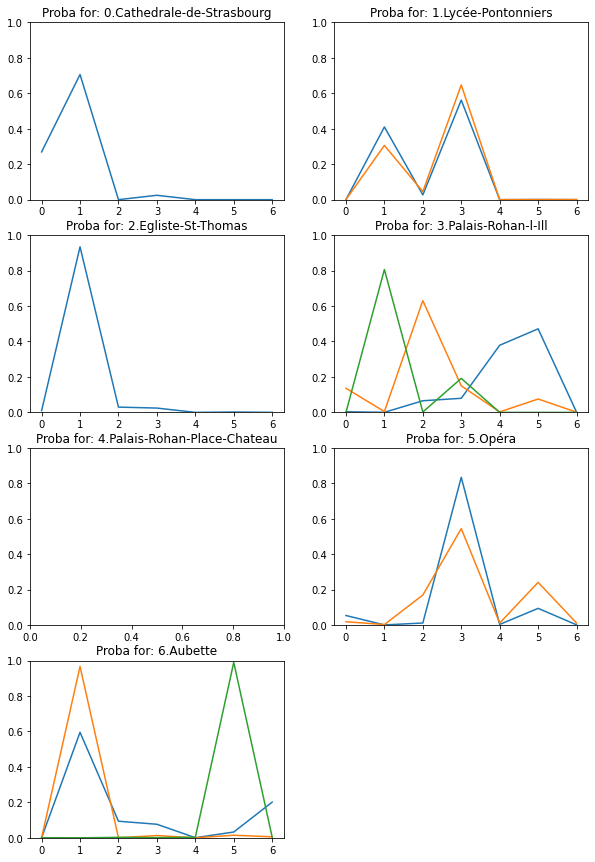

In [20]:
plt.figure(figsize=(10, 15))

for i in np.unique(data['y']):
    
    plt.subplot(4, 2, i + 1)
    
    for arr in pred_mod_2[data['y'] == i]:
        if np.argmax(arr) != i:
            plt.plot(np.arange(0, 7), arr)
            plt.axis(ymin=0, ymax=1)

    plt.title(f'Proba for: {data["target_names"][i]}')    

plt.show()

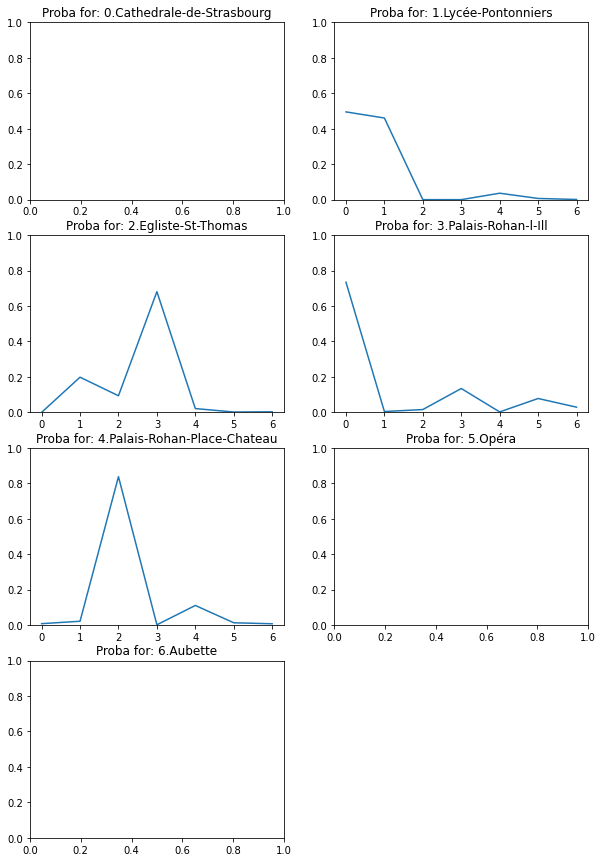

In [21]:
plt.figure(figsize=(10, 15))

for i in np.unique(data['y']):
    
    plt.subplot(4, 2, i + 1)
    
    for arr in pred_mod_3[data['y'] == i]:
        if np.argmax(arr) != i:
            plt.plot(np.arange(0, 7), arr)
            plt.axis(ymin=0, ymax=1)
            
    plt.title(f'Proba for: {data["target_names"][i]}')    

plt.show()

Errors for 0.Cathedrale-de-Strasbourg
Errors for 1.Lycée-Pontonniers
Errors for 2.Egliste-St-Thomas
189
195
Errors for 3.Palais-Rohan-l-Ill
268
Errors for 4.Palais-Rohan-Place-Chateau
322
Errors for 5.Opéra
Errors for 6.Aubette
462
477


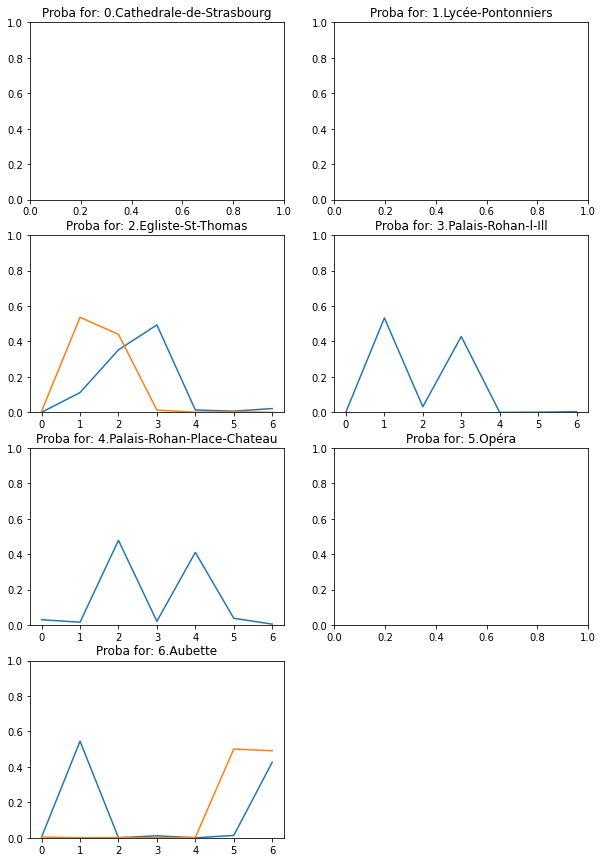

In [143]:
pred_mod_2 = model_2.predict(data['images'] / 255.)
pred_mod_3 = model_3.predict(data['images'] / 255.)

pred_23 = (pred_mod_2 + pred_mod_3) / 2.

plt.figure(figsize=(10, 15))

images_idx = 0

for i in np.unique(data['y']):
    
    plt.subplot(4, 2, i + 1)
    
    print(f'Errors for {data["target_names"][i]}')
    
    for arr in pred_23[data['y'] == i]:
        if np.argmax(arr) != i:
            plt.plot(np.arange(0, 7), arr)
            plt.axis(ymin=0, ymax=1)
            
            print(images_idx)
        
        images_idx += 1

    plt.title(f'Proba for: {data["target_names"][i]}')    

plt.show()

In [169]:
# threshold above which the model is reliable on the dataset

pred_23_above_75 = np.argmax(pred_23[np.max(pred_23, axis=1) > .75], axis=1)
target_for_pred_23_above_75 = data['y'][np.max(pred_23, axis=1) > .75]

score = accuracy_score(pred_23_above_75, target_for_pred_23_above_75)

threshold = .75
while score == 1:
    threshold -= .01
    pred_23_above_75 = np.argmax(pred_23[np.max(pred_23, axis=1) > threshold], axis=1)
    target_for_pred_23_above_75 = data['y'][np.max(pred_23, axis=1) > threshold]
    score = accuracy_score(pred_23_above_75, target_for_pred_23_above_75)

threshold

0.5399999999999998

In [135]:
def prediction(image_arr):
    image_arr = cv2.resize(image_arr, (64, 64))
    image_arr = np.array([image_arr]) / 255.
    
    pred_mod_2 = model_2.predict([image_arr])
    pred_mod_3 = model_3.predict([image_arr])  
    pred_23 = (pred_mod_2 + pred_mod_3) / 2.
    
    proba_pred_23 = pred_23[0][np.argmax(pred_23)]
    
    if proba_pred_23 >= .75:
        return {np.argmax(pred_23): proba_pred_23}
    
    elif proba_pred_23 < .75 and proba_pred_23 >= .4:
        pred_sort = np.argsort(pred_23[0])[-2:]
        res = dict()
        res[pred_sort[0]] = pred_23[0][pred_sort[0]]
        res[pred_sort[1]] = pred_23[0][pred_sort[1]]
        return res
    
    else:
        return -1
    

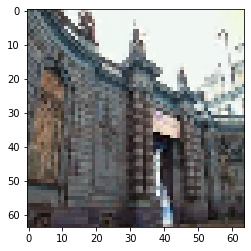

In [141]:
plt.imshow(data['images'][322])
plt.show()

In [192]:
res = prediction(data['images'][322])

In [194]:
res

{4: 0.41026062, 2: 0.47809893}

In [193]:
list(res.keys())

[4, 2]

In [129]:
data['target_names']

{0: '0.Cathedrale-de-Strasbourg',
 1: '1.Lycée-Pontonniers',
 2: '2.Egliste-St-Thomas',
 3: '3.Palais-Rohan-l-Ill',
 4: '4.Palais-Rohan-Place-Chateau',
 5: '5.Opéra',
 6: '6.Aubette'}

In [170]:
{0: -1} == -1

False